In [171]:
%matplotlib inline
import pandas as pd
import transit
import numpy as np
import matplotlib.pyplot as plt

We first simply compile all the information in the literature about secure mass measurements for rocky planets

In [172]:
name = 'KOI1169b'
prad = 1.50
praderr = 0.13
pmass = 5.3
pmasserr = 1.2
Rs_a = 0.33
Rs_aerr = 0.02
Rs = 1.09
Rserr = 0.09
teff = 5650
tefferr = 120
reference = 'This work'

columns = ['Name', 'PRad', 'PRaderr', 'PMass', 'PMasserr', 'Rstar_a','Rstar_aerr',
           'Rstar', 'Rstarerr', 'Teff', 'Tefferr', 'USPflag', 'TTVflag' ,'Reference']
planetframe = pd.DataFrame( columns=columns)

planetframe.loc[0] = [name, prad, praderr, pmass, pmasserr, Rs_a, Rs_aerr, Rs, Rserr, teff, tefferr, 1, 0, reference]
planetframe.loc[1] = ['Kepler-78b', 1.20, 0.09, 1.87, 0.27, 1.0/2.7, 0.2/2.7**2, 0.74, 0.05, 5121, 44, 1, 0,
                      'Howard et al. 2013, Grunblatt et al. 2014']
planetframe.loc[2] = ['Kepler-10b', 1.47, 0.03, 3.33, 0.49, 1.0/3.4, 0.2/3.4**2.0, 1.065, 0.009, 5708, 29, 1,0,
                      'Dumusque et al. 2014']
planetframe.loc[3] = ['CoRoT-7b',  1.585, 0.064, 5.84, 0.86, 1.0/4.48, 0.07/4.48**2, 0.82, 0.019, 5259, 58,1, 0,
                      'Barros et al. 2014']
planetframe.loc[4] = ['55Cnc-e',  2.00, 0.14, 8.63, 0.35, 0.2769, 0.0043, 0.943, 0.10, 5196, 24 ,1, 0,
                      'Winn et al. 2011, Von Braun et al. 2011']
planetframe.loc[5] = ['Kepler-20b',  1.87, 0.16, 8.7, 2.2, 1.0/10.4, 0.9/10.4**2, 0.93, 0.08, 5455, 100, 0,0,
                      'Gautier et al. 2011']
planetframe.loc[6] = ['Kepler-89b',  1.71, 0.16, 10.5, 4.6, 1.0/7.25, 0.59/7.25**2, 1.52, 0.14, 6182, 58, 0,0,
                      'Weiss et al. 2012']
planetframe.loc[7] = ['Kepler-113b', 1.82, 0.05, 11.7, 4.2, 1.0/14.5,1.1/14.5**2, 0.69, 0.02, 4725, 74, 0,  0,
                      'Marcy et al. 2014']
planetframe.loc[8] = ['Kepler-98b', 1.99, 0.22, 3.55, 1.6, 1.0/3.3, 1.6/3.3**2,   1.11, 0.12, 5539, 73, 0, 0,  
                      'Marcy et al. 2014']
planetframe.loc[9] = ['Kepler-99b', 1.48, 0.08, 6.15, 1.3, 1.0/8.45, 4.2/8.45**2 , 0.73, 0.04, 4782, 129, 0, 0,
                      'Marcy et al. 2014']
planetframe.loc[10] = ['Kepler-406b', 1.43, 0.03, 6.35, 1.4, 1.0/7.04, 0.465/7.04**2,  1.07, 0.02, 5538, 75, 0, 0,   
                      'Marcy et al. 2014']
planetframe.loc[11] = ['Kepler-100b', 1.32, 0.04, 7.34, 3.2, 1.0/10.3, 3.3/10.3**2,  1.49, 0.04, 5825, 75, 0, 0, 
                      'Marcy et al. 2014']
planetframe.loc[12] = ['Kepler-113b', 1.82, 0.05, 11.7, 4.2, 1.0/14.53, 1.1/14.53**2, 0.69, 0.02, 4725, 74, 0, 0, 
                      'Marcy et al. 2014']
planetframe.loc[13] = ['Kepler-102d',  1.18, 0.04, 3.8, 1.8 , 1.0/16.4, 6.8/16.4**2, 0.74, 0.02, 4903, 74, 0, 0,
                      'Marcy et al. 2014']
planetframe.loc[14] = ['Kepler-93b', 1.478, 0.019, 4.02, 0.68, 1.0/12.496,0.015/12.496**2, 0.919, 0.011, 5669, 75, 0,0,
                      'Dressing et al. 2015']
planetframe.loc[15] = ['Kepler-36b', 1.486, 0.035, 4.5, 0.3, 0.0654,0.0003, 1.626, 0.019, 5911, 66, 0.0, 1.0, 
                      'Carter et al. 2012']
planetframe.loc[16] = ['Kepler-138b',  1.61, 0.16, 3.9, 1.4, 1.0/47.55, 2.4/47.55**2, 0.54, 0.05, 3871, 58, 0, 1, 
                      'Kipping et al. 2014']
planetframe.loc[17] = ['Kepler-138c',  1.61, 0.16, 1.0, 0.4, 1.0/40.8, 19.1/40.8**2, 0.54, 0.05, 3871, 58, 0, 1, 
                      'Kipping et al. 2014']
planetframe.loc[18] = ['WASP-47e', 1.817, 0.065, 12.2, 3.7, 1.0/3.24, 0.14/3.24**2, 1.15, 0.04, 5576, 67, 1, 0,
                      'Becker et al. 2015, Fei et al. 2015']

#Change a/R for Marcy and Kipping planets from the stellar densities

newr_a = pd.DataFrame( columns = ['Name', 'Rhostar', 'Rhostarerr', 'period'])

newr_a.loc[0] = ['Kepler-113b', 2.71, 0.08, 4.754]
newr_a.loc[1] = ['Kepler-98b', 1.12, 0.34, 1.54168]
newr_a.loc[2] = ['Kepler-99b', 2.86, 0.23, 4.60358]
newr_a.loc[3] = ['Kepler-406b', 1.12, 0.02, 2.42629]
newr_a.loc[4] = ['Kepler-100b', 0.44, 0.01, 6.88705]
newr_a.loc[5] = ['Kepler-138b', 2.9, 0.6, 13.78164]
newr_a.loc[6] = ['Kepler-138c', 2.9, 0.6, 23.08933]
newr_a.loc[7] = ['Kepler-113b', 2.71, .08, 4.754]
newr_a.loc[8] = ['Kepler-102d', 2.76, 0.09, 10.3717]

In [173]:
def getr_a(pl):
    G = 6.6730e-11
    P1 = pl["period"]*24.0*3600.0
    return ((3.0*np.pi/(G*P1**2))*(1.0/(pl["Rhostar"]*1000.0)))**0.333

def getr_aerr(pl):
    return pl["Rs_a"]*np.sqrt((0.333*pl["Rhostarerr"]/pl["Rhostar"])**2)

In [174]:
newr_a["Rs_a"] = newr_a.apply(lambda pl: getr_a(pl), axis=1)
newr_a["Rs_aerr"] = newr_a.apply(lambda pl: getr_aerr(pl), axis=1)
print newr_a

          Name  Rhostar  Rhostarerr    period      Rs_a   Rs_aerr
0  Kepler-113b     2.71        0.08   4.75400  0.067782  0.000666
1   Kepler-98b     1.12        0.34   1.54168  0.192585  0.019468
2   Kepler-99b     2.86        0.23   4.60358  0.068018  0.001822
3  Kepler-406b     1.12        0.02   2.42629  0.142382  0.000847
4  Kepler-100b     0.44        0.01   6.88705  0.097010  0.000734
5  Kepler-138b     2.90        0.60  13.78164  0.032618  0.002247
6  Kepler-138c     2.90        0.60  23.08933  0.023132  0.001594
7  Kepler-113b     2.71        0.08   4.75400  0.067782  0.000666
8  Kepler-102d     2.76        0.09  10.37170  0.040072  0.000435


In [175]:
for name in newr_a.Name:
    planetframe.loc[planetframe.Name == name, ['Rstar_a', 'Rstar_aerr']] = newr_a.loc[newr_a.Name == name, 
                                                                                    ['Rs_a', 'Rs_aerr']].values



           Name   PRad  PRaderr  PMass  PMasserr   Rstar_a  Rstar_aerr  Rstar  \
0      KOI1169b  1.500    0.130   5.30      1.20  0.330000    0.020000  1.090   
1    Kepler-78b  1.200    0.090   1.87      0.27  0.370370    0.027435  0.740   
2    Kepler-10b  1.470    0.030   3.33      0.49  0.294118    0.017301  1.065   
3      CoRoT-7b  1.585    0.064   5.84      0.86  0.223214    0.003488  0.820   
4       55Cnc-e  2.000    0.140   8.63      0.35  0.276900    0.004300  0.943   
5    Kepler-20b  1.870    0.160   8.70      2.20  0.096154    0.008321  0.930   
6    Kepler-89b  1.710    0.160  10.50      4.60  0.137931    0.011225  1.520   
7   Kepler-113b  1.820    0.050  11.70      4.20  0.067782    0.000666  0.690   
8    Kepler-98b  1.990    0.220   3.55      1.60  0.192585    0.019468  1.110   
9    Kepler-99b  1.480    0.080   6.15      1.30  0.068018    0.001822  0.730   
10  Kepler-406b  1.430    0.030   6.35      1.40  0.142382    0.000847  1.070   
11  Kepler-100b  1.320    0.

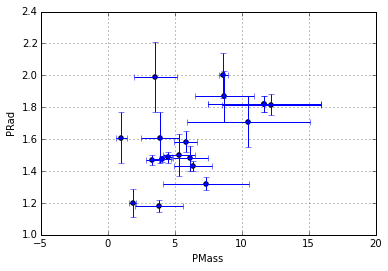

In [176]:
print planetframe

pd.DataFrame.plot(planetframe, x='PMass', y='PRad', kind='scatter', yerr='PRaderr', xerr='PMasserr')

We now start adding new columns to the data frame to look for patters in the data, starting with the planet density

In [177]:
def getdensity(pl):
    return pl["PMass"]/pl["PRad"]**3

def getdensityerr(pl):
    return pl["PDensity"]*np.sqrt((pl["PMasserr"]/pl["PMass"])**2.0 + (3.0*pl["PRaderr"]/pl["PRad"])**2)

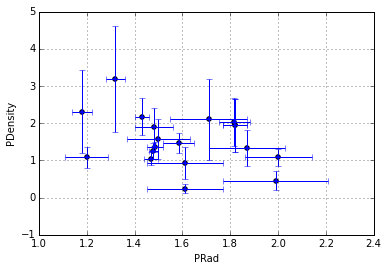

In [178]:
planetframe["PDensity"] = planetframe.apply(lambda pl: getdensity(pl), axis=1)
planetframe["PDensityerr"] = planetframe.apply(lambda pl: getdensityerr(pl), axis=1)

pd.DataFrame.plot(planetframe, x='PRad', y='PDensity', kind='scatter', yerr='PDensityerr', xerr='PRaderr')

Now the equilibrium temperature

In [179]:
def getteq(pl):
    return pl["Teff"]*np.sqrt(pl["Rstar_a"])

def getteqerr(pl):
    return pl["Teq"]*np.sqrt((pl["Tefferr"]/pl["Teff"])**2.0 + (0.5*pl["Rstar_aerr"]/pl["Rstar_a"])**2)

           Name   PRad  PRaderr  PMass  PMasserr   Rstar_a  Rstar_aerr  Rstar  \
0      KOI1169b  1.500    0.130   5.30      1.20  0.330000    0.020000  1.090   
1    Kepler-78b  1.200    0.090   1.87      0.27  0.370370    0.027435  0.740   
2    Kepler-10b  1.470    0.030   3.33      0.49  0.294118    0.017301  1.065   
3      CoRoT-7b  1.585    0.064   5.84      0.86  0.223214    0.003488  0.820   
4       55Cnc-e  2.000    0.140   8.63      0.35  0.276900    0.004300  0.943   
5    Kepler-20b  1.870    0.160   8.70      2.20  0.096154    0.008321  0.930   
6    Kepler-89b  1.710    0.160  10.50      4.60  0.137931    0.011225  1.520   
7   Kepler-113b  1.820    0.050  11.70      4.20  0.067782    0.000666  0.690   
8    Kepler-98b  1.990    0.220   3.55      1.60  0.192585    0.019468  1.110   
9    Kepler-99b  1.480    0.080   6.15      1.30  0.068018    0.001822  0.730   
10  Kepler-406b  1.430    0.030   6.35      1.40  0.142382    0.000847  1.070   
11  Kepler-100b  1.320    0.

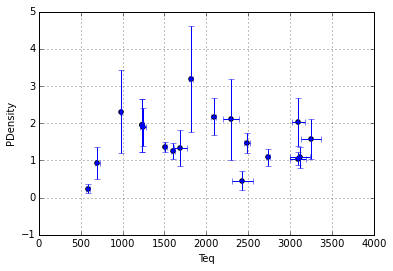

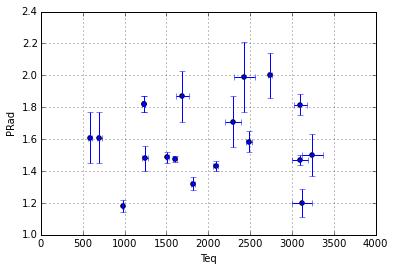

In [180]:
planetframe["Teq"] = planetframe.apply(lambda pl: getteq(pl), axis=1)
planetframe["Teqerr"] = planetframe.apply(lambda pl: getteqerr(pl), axis=1)

pd.DataFrame.plot(planetframe, x='Teq', y='PDensity', kind='scatter', yerr='PDensityerr', xerr='Teqerr')
pd.DataFrame.plot(planetframe, x='Teq', y='PRad', kind='scatter', yerr='PRaderr', xerr='Teqerr')


print planetframe

In [223]:
def getweightedbydens(df, column):
#    weights =1.0/(df.loc[:, "PDensityerr"].values**2)
    weights =1.0/((df.loc[:, "PDensityerr"].values/df.loc[:, "PDensity"].values)**2)
    weights = weights/np.sum(weights)
    values = df.loc[:, column].values
    errors = df.loc[:, column+'err'].values
    return np.sum(weights*values), np.sqrt(np.sum((weights*errors)**2)),len(weights)

In [224]:
print getweightedbydens(planetframe.query('Teq > 2250'), "PDensity")
print getweightedbydens(planetframe.query('Teq < 2250 and Teq > 1000'), "PDensity")

(1.2717775599729997, 0.11666240330632464, 8)
(1.5500079863560923, 0.11322688412658811, 8)


In [225]:
print getweightedbydens(planetframe.query('Teq > 2250'), "PRad")
print getweightedbydens(planetframe.query('Teq < 2250 and Teq > 1000'), "PRad")

(1.6041059205636299, 0.033114932863965371, 8)
(1.5141771897666634, 0.020986984594497566, 8)


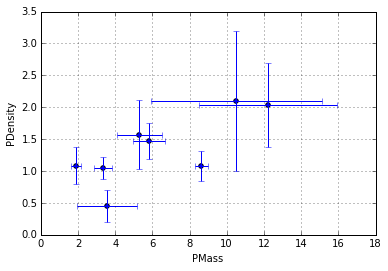

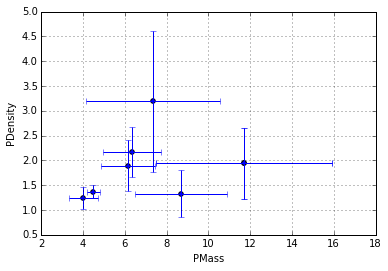

In [219]:
pd.DataFrame.plot(planetframe.query('Teq > 2250'), x='PMass', y='PDensity', kind='scatter', yerr='PDensityerr', xerr='PMasserr')
pd.DataFrame.plot(planetframe.query('Teq < 2250 and Teq > 1000'), x='PMass', y='PDensity', kind='scatter', yerr='PDensityerr', xerr='PMasserr')

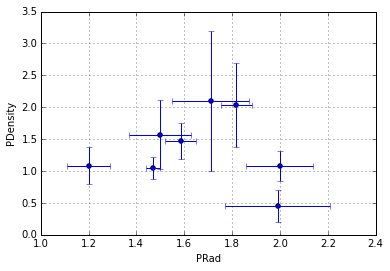

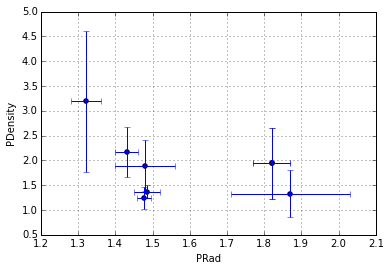

In [220]:
pd.DataFrame.plot(planetframe.query('Teq > 2250'), x='PRad', y='PDensity', kind='scatter', yerr='PDensityerr', xerr='PRaderr')
pd.DataFrame.plot(planetframe.query('Teq < 2250 and Teq > 1000'), x='PRad', y='PDensity', kind='scatter', yerr='PDensityerr', xerr='PRaderr')